In [12]:
!pip install ucimlrepo
import numpy as np
from tqdm import tqdm
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
# fetch dataset 
room_occupancy_estimation = fetch_ucirepo(id=864) 
  
# data (as pandas dataframes) 
X = room_occupancy_estimation.data.features 
y = room_occupancy_estimation.data.targets
Z = pd.DataFrame()

In [22]:
X

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0


In [23]:
X.loc[:,'Date'] = pd.to_datetime(X.loc[:,'Date'])
X.loc[:,'Time'] = pd.to_timedelta(X.loc[:,'Time'])
X['Datetime'] = X["Date"] + X["Time"]
X['Datetime'] = pd.to_datetime(X['Datetime'])

X['target'] = y
X['Year'] = X['Datetime'].dt.year
X['Month'] = X['Datetime'].dt.month
X['Day'] = X['Datetime'].dt.day
X['Hour'] = X['Datetime'].dt.hour
X['Minute'] = X['Datetime'].dt.minute

In [24]:
# Define a function to categorize time of day
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Extract hour from datetime column and apply categorize_time_of_day function
X['time_of_day'] = X['Datetime'].dt.hour.apply(categorize_time_of_day)

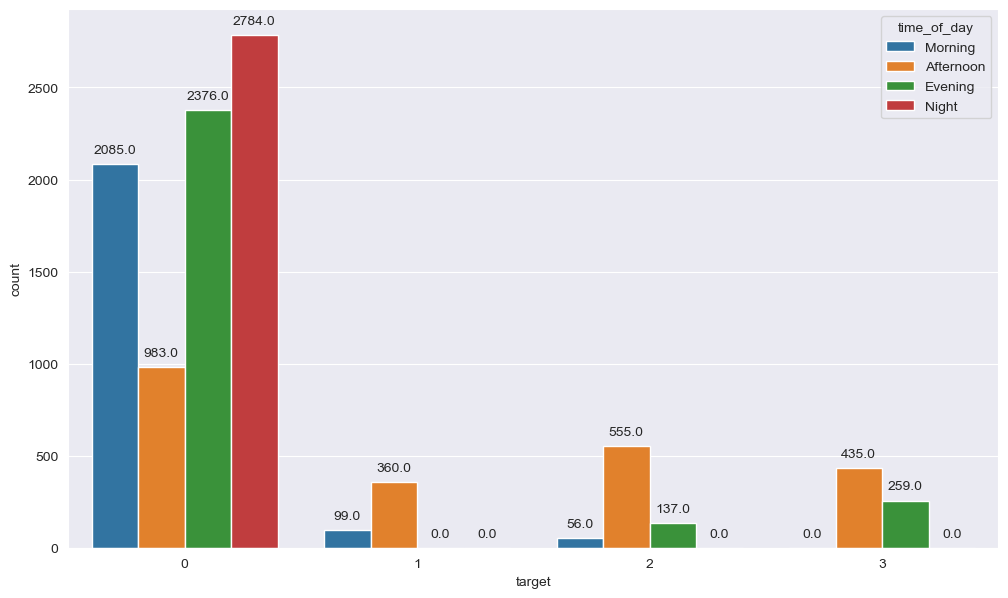

In [25]:
#Classification of records based on time of day
plt.figure(figsize=(12,7))
ax = sns.countplot(data = X,x = 'target', hue = 'time_of_day', hue_order = ['Morning','Afternoon','Evening','Night'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [26]:
X = X.drop(['Datetime', 'Date', 'Time', 'time_of_day'],axis=1)

In [27]:
X.corr() > 0.9

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,...,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,target,Year,Month,Day,Hour,Minute
S1_Temp,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
S2_Temp,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
S3_Temp,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
S4_Temp,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
S1_Light,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
S2_Light,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
S3_Light,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
S4_Light,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
S1_Sound,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
S2_Sound,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## Reasons for dropping 'Date' and 'Time' column's

- As we have seen in the graph that there 0 data values for class 0 during Afternoon, Evening, Morning and alot of values for Night only. For our learning purposes we don't want that to effect of hour of day to skew the results.
- Also, as we can see that hour of day, day, month, year(features extracted from date and time) have no impact on  data. We would prefer dropping 'Date' and 'Time'